In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional, GRU
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from numpy import loadtxt
from keras.models import load_model
from time import sleep
from tqdm import tqdm

## data preprocessing

In [2]:
dataset_path = ('GEANT-OD_pair_time_convert.csv')
dataset = pd.read_csv(dataset_path, parse_dates=["time"])
dataset.shape

(10769, 530)

In [3]:
dataset=dataset.set_index(['time'])
dataset.head()

,OD_1-1,OD_1-2,OD_1-3,OD_1-4,OD_1-5,OD_1-6,OD_1-7,OD_1-8,OD_1-9,OD_1-10,...,OD_23-14,OD_23-15,OD_23-16,OD_23-17,OD_23-18,OD_23-19,OD_23-20,OD_23-21,OD_23-22,OD_23-23
time,,,,,,,,,,,,,,,,,,,,,
2005-05-04 15:30:00,0.0,16760.79111,12407.777780,10453.848890,1468.631111,4768.444444,25290.37333,2468.515556,7984.213333,3063.937778,...,0.0,211.395556,1212.666667,1026.391111,51508.78222,1488.951111,175293.2444,3247.164444,14.106667,0.0
2005-05-04 15:45:00,0.0,16346.46222,9373.208889,8439.048889,1032.906667,1649.520000,14433.05778,3182.986667,7243.173333,3793.306667,...,0.0,190.142222,1079.751111,529.617778,44913.43111,1410.400000,148162.8711,3669.173333,6.880000,0.0
2005-05-04 16:00:00,0.0,16755.22667,10638.302220,12623.520000,721.226667,1693.057778,17066.67556,5304.195556,6696.844444,3171.315556,...,0.0,51.048889,1750.631111,81.760000,47603.85778,1016.977778,154312.8711,3452.320000,24.488889,0.0
2005-05-04 16:15:00,0.0,18488.00889,12263.697780,13389.128890,995.600000,2984.231111,13325.22667,6248.248889,5719.804444,3289.697778,...,0.0,217.911111,3313.120000,356.000000,47023.99111,1092.017778,148199.6622,3300.613333,36.951111,0.0
2005-05-04 16:30:00,0.0,13748.27556,11323.333330,14048.426670,804.044444,2698.124444,16651.25333,5761.528889,5088.204444,3262.595556,...,0.0,292.071111,4479.644444,541.288889,47737.10222,1139.217778,147601.5467,4073.137778,59.848889,0.0


In [4]:
dataset.isnull().sum()

OD_1-1      0
OD_1-2      0
OD_1-3      0
OD_1-4      0
OD_1-5      0
           ..
OD_23-19    0
OD_23-20    0
OD_23-21    0
OD_23-22    0
OD_23-23    0
Length: 529, dtype: int64

In [5]:
np.where(np.isnan(dataset)) 

(array([], dtype=int64), array([], dtype=int64))

In [6]:
dataset.tail()

,OD_1-1,OD_1-2,OD_1-3,OD_1-4,OD_1-5,OD_1-6,OD_1-7,OD_1-8,OD_1-9,OD_1-10,...,OD_23-14,OD_23-15,OD_23-16,OD_23-17,OD_23-18,OD_23-19,OD_23-20,OD_23-21,OD_23-22,OD_23-23
time,,,,,,,,,,,,,,,,,,,,,
2005-08-31 06:45:00,0.0,2152.924444,0.0,1847.493333,210.124444,1237.360000,68.746667,4979.697778,116.871111,1229.848889,...,0.0,9318.675556,66.871111,482.311111,2329.564444,878.035556,119879.8844,249.440000,37.022222,0.0
2005-08-31 07:00:00,0.0,1030.453333,0.0,4569.946667,1531.866667,1965.822222,1.475556,5078.666667,157.457778,960.746667,...,0.0,9558.613333,77.982222,200.968889,2465.004444,960.871111,122241.0844,431.164444,24.977778,0.0
2005-08-31 07:15:00,0.0,390.408889,0.0,5156.524444,4880.293333,1835.742222,0.862222,5826.880000,149.813333,1121.991111,...,0.0,8911.973333,139.751111,273.537778,1968.320000,833.466667,123267.3867,403.288889,0.000000,0.0
2005-08-31 07:30:00,0.0,519.155556,0.0,3845.191111,663.422222,1808.435556,0.391111,2657.511111,133.413333,1038.924444,...,0.0,9549.253333,46.835556,254.151111,2169.271111,930.284444,119550.0000,351.555556,2.622222,0.0
2005-08-31 07:45:00,0.0,1131.128889,0.0,1243.200000,372.400000,2171.164444,0.426667,2533.546667,300.497778,1237.626667,...,0.0,8818.835556,146.008889,370.248889,2705.857778,937.822222,117472.8622,56.648889,0.000000,0.0


## Train-test split

In [7]:
print("dataset_shape_aftersampling:", dataset.shape)

dataset_shape_aftersampling: (10769, 529)


In [8]:
train_df, test_df = dataset[0:8615], dataset[8615:] # total dataset


In [9]:
train_df=pd.DataFrame(train_df)

In [10]:
test_df=pd.DataFrame(test_df)

In [11]:
print("train_shape:", train_df.shape) 
train_df.head()

train_shape: (8615, 529)


,OD_1-1,OD_1-2,OD_1-3,OD_1-4,OD_1-5,OD_1-6,OD_1-7,OD_1-8,OD_1-9,OD_1-10,...,OD_23-14,OD_23-15,OD_23-16,OD_23-17,OD_23-18,OD_23-19,OD_23-20,OD_23-21,OD_23-22,OD_23-23
time,,,,,,,,,,,,,,,,,,,,,
2005-05-04 15:30:00,0.0,16760.79111,12407.777780,10453.848890,1468.631111,4768.444444,25290.37333,2468.515556,7984.213333,3063.937778,...,0.0,211.395556,1212.666667,1026.391111,51508.78222,1488.951111,175293.2444,3247.164444,14.106667,0.0
2005-05-04 15:45:00,0.0,16346.46222,9373.208889,8439.048889,1032.906667,1649.520000,14433.05778,3182.986667,7243.173333,3793.306667,...,0.0,190.142222,1079.751111,529.617778,44913.43111,1410.400000,148162.8711,3669.173333,6.880000,0.0
2005-05-04 16:00:00,0.0,16755.22667,10638.302220,12623.520000,721.226667,1693.057778,17066.67556,5304.195556,6696.844444,3171.315556,...,0.0,51.048889,1750.631111,81.760000,47603.85778,1016.977778,154312.8711,3452.320000,24.488889,0.0
2005-05-04 16:15:00,0.0,18488.00889,12263.697780,13389.128890,995.600000,2984.231111,13325.22667,6248.248889,5719.804444,3289.697778,...,0.0,217.911111,3313.120000,356.000000,47023.99111,1092.017778,148199.6622,3300.613333,36.951111,0.0
2005-05-04 16:30:00,0.0,13748.27556,11323.333330,14048.426670,804.044444,2698.124444,16651.25333,5761.528889,5088.204444,3262.595556,...,0.0,292.071111,4479.644444,541.288889,47737.10222,1139.217778,147601.5467,4073.137778,59.848889,0.0


In [12]:
print("test_shape:",test_df.shape)
test_df.tail()

test_shape: (2154, 529)


,OD_1-1,OD_1-2,OD_1-3,OD_1-4,OD_1-5,OD_1-6,OD_1-7,OD_1-8,OD_1-9,OD_1-10,...,OD_23-14,OD_23-15,OD_23-16,OD_23-17,OD_23-18,OD_23-19,OD_23-20,OD_23-21,OD_23-22,OD_23-23
time,,,,,,,,,,,,,,,,,,,,,
2005-08-31 06:45:00,0.0,2152.924444,0.0,1847.493333,210.124444,1237.360000,68.746667,4979.697778,116.871111,1229.848889,...,0.0,9318.675556,66.871111,482.311111,2329.564444,878.035556,119879.8844,249.440000,37.022222,0.0
2005-08-31 07:00:00,0.0,1030.453333,0.0,4569.946667,1531.866667,1965.822222,1.475556,5078.666667,157.457778,960.746667,...,0.0,9558.613333,77.982222,200.968889,2465.004444,960.871111,122241.0844,431.164444,24.977778,0.0
2005-08-31 07:15:00,0.0,390.408889,0.0,5156.524444,4880.293333,1835.742222,0.862222,5826.880000,149.813333,1121.991111,...,0.0,8911.973333,139.751111,273.537778,1968.320000,833.466667,123267.3867,403.288889,0.000000,0.0
2005-08-31 07:30:00,0.0,519.155556,0.0,3845.191111,663.422222,1808.435556,0.391111,2657.511111,133.413333,1038.924444,...,0.0,9549.253333,46.835556,254.151111,2169.271111,930.284444,119550.0000,351.555556,2.622222,0.0
2005-08-31 07:45:00,0.0,1131.128889,0.0,1243.200000,372.400000,2171.164444,0.426667,2533.546667,300.497778,1237.626667,...,0.0,8818.835556,146.008889,370.248889,2705.857778,937.822222,117472.8622,56.648889,0.000000,0.0


In [13]:
sc = MinMaxScaler(feature_range=(0,1))
sc=sc.fit(train_df)
train_df = sc.transform(train_df)
test_df = sc.transform(test_df)
#print("train_df", train_df)
#print("test_df", test_df)
train_df=pd.DataFrame(train_df) 
test_df=pd.DataFrame(test_df)

In [14]:
train_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,519,520,521,522,523,524,525,526,527,528
8610,0.0,0.000857,0.002327,0.035872,0.075669,0.000034,0.000000,0.000059,9.941869e-07,0.000206,...,0.0,0.002203,0.046844,0.027464,0.015558,0.059015,0.007426,0.000007,0.000125,0.0
8611,0.0,0.000581,0.001609,0.021112,0.047583,0.000038,0.000016,0.000034,5.303416e-06,0.000310,...,0.0,0.001611,0.033565,0.029432,0.016792,0.044569,0.007726,0.000005,0.002145,0.0
8612,0.0,0.000475,0.002059,0.026052,0.043870,0.000070,0.000008,0.000043,2.194196e-06,0.000304,...,0.0,0.002944,0.031120,0.025830,0.017493,0.057213,0.007939,0.000003,0.000081,0.0
8613,0.0,0.000349,0.000688,0.085489,0.016884,0.000033,0.000170,0.000017,0.000000e+00,0.000288,...,0.0,0.001621,0.022668,0.022845,0.019531,0.062410,0.007812,0.000012,0.000202,0.0
8614,0.0,0.000402,0.002810,0.085602,0.023443,0.000055,0.000021,0.000035,1.168344e-06,0.000340,...,0.0,0.001343,0.027190,0.024130,0.015608,0.063531,0.007959,0.000010,0.000160,0.0


In [15]:
test_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,519,520,521,522,523,524,525,526,527,528
2149,0.0,0.026102,0.0,0.043389,0.016551,0.000065,0.000405,0.000261,0.000006,0.000064,...,0.0,0.066571,0.002322,0.023177,0.001981,0.045390,0.005981,0.000013,0.003035,0.0
2150,0.0,0.012493,0.0,0.107327,0.120661,0.000103,0.000009,0.000266,0.000008,0.000050,...,0.0,0.068285,0.002711,0.009657,0.002193,0.049673,0.006105,0.000023,0.002048,0.0
2151,0.0,0.004733,0.0,0.121103,0.384409,0.000096,0.000005,0.000305,0.000008,0.000059,...,0.0,0.063666,0.004873,0.013145,0.001417,0.043085,0.006159,0.000021,0.000000,0.0
2152,0.0,0.006294,0.0,0.090306,0.052256,0.000095,0.000002,0.000139,0.000007,0.000054,...,0.0,0.068218,0.001620,0.012213,0.001731,0.048092,0.005964,0.000018,0.000215,0.0
2153,0.0,0.013714,0.0,0.029197,0.029333,0.000114,0.000003,0.000133,0.000016,0.000065,...,0.0,0.063000,0.005092,0.017792,0.002570,0.048482,0.005855,0.000003,0.000000,0.0


In [16]:
train_df_inverse=sc.inverse_transform(train_df)
train_df_inverse=pd.DataFrame(train_df_inverse)
train_df_inverse.tail()

,0,1,2,3,4,5,6,7,8,9,...,519,520,521,522,523,524,525,526,527,528
8610,0.0,70.720000,77.964444,1527.404444,960.666667,648.417778,0.000000,1131.537778,18.977778,3935.955556,...,0.0,308.400000,1338.568889,571.528889,11014.88000,1141.511111,147450.4356,136.568889,1.528889,0.0
8611,0.0,47.884444,53.902222,898.933333,604.088889,726.968889,2.702222,652.826667,101.235556,5920.888889,...,0.0,225.528889,959.280000,612.488889,11804.60444,862.160000,153175.2089,101.377778,26.168889,0.0
8612,0.0,39.173333,68.995556,1109.288889,556.951111,1327.840000,1.422222,823.288889,41.884444,5803.137778,...,0.0,412.062222,889.431111,537.528889,12252.74667,1106.666667,157235.1378,65.031111,0.986667,0.0
8613,0.0,28.791111,23.040000,3640.097778,214.355556,627.591111,28.826667,330.151111,0.000000,5495.191111,...,0.0,226.951111,648.008889,475.395556,13557.05778,1207.155556,154806.0000,231.946667,2.462222,0.0
8614,0.0,33.137778,94.160000,3644.897778,297.617778,1047.680000,3.626667,664.560000,22.302222,6484.942222,...,0.0,187.991111,777.182222,502.142222,11047.41333,1228.835556,157610.7911,200.168889,1.955556,0.0


In [17]:
test_df_inverse=sc.inverse_transform(test_df)
test_df_inverse=pd.DataFrame(test_df_inverse)
test_df_inverse.tail()

,0,1,2,3,4,5,6,7,8,9,...,519,520,521,522,523,524,525,526,527,528
2149,0.0,2152.924444,0.0,1847.493333,210.124444,1237.360000,68.746667,4979.697778,116.871111,1229.848889,...,0.0,9318.675556,66.871111,482.311111,2329.564444,878.035556,119879.8844,249.440000,37.022222,0.0
2150,0.0,1030.453333,0.0,4569.946667,1531.866667,1965.822222,1.475556,5078.666667,157.457778,960.746667,...,0.0,9558.613333,77.982222,200.968889,2465.004444,960.871111,122241.0844,431.164444,24.977778,0.0
2151,0.0,390.408889,0.0,5156.524444,4880.293333,1835.742222,0.862222,5826.880000,149.813333,1121.991111,...,0.0,8911.973333,139.751111,273.537778,1968.320000,833.466667,123267.3867,403.288889,0.000000,0.0
2152,0.0,519.155556,0.0,3845.191111,663.422222,1808.435556,0.391111,2657.511111,133.413333,1038.924444,...,0.0,9549.253333,46.835556,254.151111,2169.271111,930.284444,119550.0000,351.555556,2.622222,0.0
2153,0.0,1131.128889,0.0,1243.200000,372.400000,2171.164444,0.426667,2533.546667,300.497778,1237.626667,...,0.0,8818.835556,146.008889,370.248889,2705.857778,937.822222,117472.8622,56.648889,0.000000,0.0


## Converting the time series to samples

In [18]:
def create_dataset(X, y , time_step=1):
    Xs, ys = [], []
    for i in tqdm (range(len(X)-time_step)):
        v=X.iloc[i:(i+time_step)].to_numpy()
        Xs.append(v)
        ys.append(y.iloc[i+time_step])
    return np.array(Xs), np.array(ys)

In [19]:
TIME_STEP=12
x_train, y_train = create_dataset(train_df, train_df, TIME_STEP)
x_test, y_test = create_dataset(test_df, test_df, TIME_STEP)

100%|██████████| 2142/2142 [00:00<00:00, 8135.28it/s]


In [20]:
print("x_train_shape:", x_train.shape)
#print("x_train:", x_train)
print("y_train_shape:", y_train.shape)
y_train=pd.DataFrame(y_train)
y_train.tail()

x_train_shape: (8603, 12, 529)
y_train_shape: (8603, 529)


,0,1,2,3,4,5,6,7,8,9,...,519,520,521,522,523,524,525,526,527,528
8598,0.0,0.000857,0.002327,0.035872,0.075669,0.000034,0.000000,0.000059,9.941869e-07,0.000206,...,0.0,0.002203,0.046844,0.027464,0.015558,0.059015,0.007426,0.000007,0.000125,0.0
8599,0.0,0.000581,0.001609,0.021112,0.047583,0.000038,0.000016,0.000034,5.303416e-06,0.000310,...,0.0,0.001611,0.033565,0.029432,0.016792,0.044569,0.007726,0.000005,0.002145,0.0
8600,0.0,0.000475,0.002059,0.026052,0.043870,0.000070,0.000008,0.000043,2.194196e-06,0.000304,...,0.0,0.002944,0.031120,0.025830,0.017493,0.057213,0.007939,0.000003,0.000081,0.0
8601,0.0,0.000349,0.000688,0.085489,0.016884,0.000033,0.000170,0.000017,0.000000e+00,0.000288,...,0.0,0.001621,0.022668,0.022845,0.019531,0.062410,0.007812,0.000012,0.000202,0.0
8602,0.0,0.000402,0.002810,0.085602,0.023443,0.000055,0.000021,0.000035,1.168344e-06,0.000340,...,0.0,0.001343,0.027190,0.024130,0.015608,0.063531,0.007959,0.000010,0.000160,0.0


In [21]:
y_train_inverse_verif=sc.inverse_transform(y_train)
y_train_inverse_verif=pd.DataFrame(y_train_inverse_verif)
y_train_inverse_verif.tail()

,0,1,2,3,4,5,6,7,8,9,...,519,520,521,522,523,524,525,526,527,528
8598,0.0,70.720000,77.964444,1527.404444,960.666667,648.417778,0.000000,1131.537778,18.977778,3935.955556,...,0.0,308.400000,1338.568889,571.528889,11014.88000,1141.511111,147450.4356,136.568889,1.528889,0.0
8599,0.0,47.884444,53.902222,898.933333,604.088889,726.968889,2.702222,652.826667,101.235556,5920.888889,...,0.0,225.528889,959.280000,612.488889,11804.60444,862.160000,153175.2089,101.377778,26.168889,0.0
8600,0.0,39.173333,68.995556,1109.288889,556.951111,1327.840000,1.422222,823.288889,41.884444,5803.137778,...,0.0,412.062222,889.431111,537.528889,12252.74667,1106.666667,157235.1378,65.031111,0.986667,0.0
8601,0.0,28.791111,23.040000,3640.097778,214.355556,627.591111,28.826667,330.151111,0.000000,5495.191111,...,0.0,226.951111,648.008889,475.395556,13557.05778,1207.155556,154806.0000,231.946667,2.462222,0.0
8602,0.0,33.137778,94.160000,3644.897778,297.617778,1047.680000,3.626667,664.560000,22.302222,6484.942222,...,0.0,187.991111,777.182222,502.142222,11047.41333,1228.835556,157610.7911,200.168889,1.955556,0.0


In [22]:
print("x_test_shape:", x_test.shape)
#print("x_test", x_test)
print("y_test_shape:", y_test.shape)
y_test=pd.DataFrame(y_test)
y_test.tail()

x_test_shape: (2142, 12, 529)
y_test_shape: (2142, 529)


,0,1,2,3,4,5,6,7,8,9,...,519,520,521,522,523,524,525,526,527,528
2137,0.0,0.026102,0.0,0.043389,0.016551,0.000065,0.000405,0.000261,0.000006,0.000064,...,0.0,0.066571,0.002322,0.023177,0.001981,0.045390,0.005981,0.000013,0.003035,0.0
2138,0.0,0.012493,0.0,0.107327,0.120661,0.000103,0.000009,0.000266,0.000008,0.000050,...,0.0,0.068285,0.002711,0.009657,0.002193,0.049673,0.006105,0.000023,0.002048,0.0
2139,0.0,0.004733,0.0,0.121103,0.384409,0.000096,0.000005,0.000305,0.000008,0.000059,...,0.0,0.063666,0.004873,0.013145,0.001417,0.043085,0.006159,0.000021,0.000000,0.0
2140,0.0,0.006294,0.0,0.090306,0.052256,0.000095,0.000002,0.000139,0.000007,0.000054,...,0.0,0.068218,0.001620,0.012213,0.001731,0.048092,0.005964,0.000018,0.000215,0.0
2141,0.0,0.013714,0.0,0.029197,0.029333,0.000114,0.000003,0.000133,0.000016,0.000065,...,0.0,0.063000,0.005092,0.017792,0.002570,0.048482,0.005855,0.000003,0.000000,0.0


In [23]:
y_test_inverse_verif=sc.inverse_transform(y_test)
y_test_inverse_verif=pd.DataFrame(y_test_inverse_verif)
y_test_inverse_verif.tail()

,0,1,2,3,4,5,6,7,8,9,...,519,520,521,522,523,524,525,526,527,528
2137,0.0,2152.924444,0.0,1847.493333,210.124444,1237.360000,68.746667,4979.697778,116.871111,1229.848889,...,0.0,9318.675556,66.871111,482.311111,2329.564444,878.035556,119879.8844,249.440000,37.022222,0.0
2138,0.0,1030.453333,0.0,4569.946667,1531.866667,1965.822222,1.475556,5078.666667,157.457778,960.746667,...,0.0,9558.613333,77.982222,200.968889,2465.004444,960.871111,122241.0844,431.164444,24.977778,0.0
2139,0.0,390.408889,0.0,5156.524444,4880.293333,1835.742222,0.862222,5826.880000,149.813333,1121.991111,...,0.0,8911.973333,139.751111,273.537778,1968.320000,833.466667,123267.3867,403.288889,0.000000,0.0
2140,0.0,519.155556,0.0,3845.191111,663.422222,1808.435556,0.391111,2657.511111,133.413333,1038.924444,...,0.0,9549.253333,46.835556,254.151111,2169.271111,930.284444,119550.0000,351.555556,2.622222,0.0
2141,0.0,1131.128889,0.0,1243.200000,372.400000,2171.164444,0.426667,2533.546667,300.497778,1237.626667,...,0.0,8818.835556,146.008889,370.248889,2705.857778,937.822222,117472.8622,56.648889,0.000000,0.0


In [24]:
print("x_train_shape", x_train.shape)
print("x_test_shape", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)
print("n_feature", x_train.shape[2])

x_train_shape (8603, 12, 529)
x_test_shape (2142, 12, 529)
y_train (8603, 529)
y_test (2142, 529)
n_feature 529


## Building Model

In [25]:
from keras.layers.core import Dense, Dropout, Activation

opt = keras.optimizers.Adam(learning_rate=0.0001)
d = 0.5
model = Sequential()
model.add(Bidirectional(LSTM(units=500, input_shape=(x_train.shape[1], x_train.shape[2]), activation="relu")))#, return_sequences=True))
model.add(Dropout(d))
#model.add(LSTM(units=500, activation="relu"))
#model.add(Dropout(d))
#model.add(keras.layers.Dropout(rate=0))
#model.add(LSTM(units=300, activation="relu"))
#model.add(Dropout(d))
model.add(Dense(units=529))
model.compile(loss='mean_squared_error', optimizer=opt)
model.build(input_shape = (x_train.shape[0],12,529))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (8603, 1000)              4120000   
_________________________________________________________________
dropout (Dropout)            (8603, 1000)              0         
_________________________________________________________________
dense (Dense)                (8603, 529)               529529    
Total params: 4,649,529
Trainable params: 4,649,529
Non-trainable params: 0
_________________________________________________________________


In [26]:
import time

tmps_train=time.time()
history=model.fit(
    x_train, y_train,
    epochs=1000,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)
tmps_t2=time.time()-tmps_train
print ("Train_Temps = %f" %tmps_t2)

Epoch 1/1000
242/242 [==============================] - 38s 156ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 2/1000
242/242 [==============================] - 38s 156ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 3/1000
242/242 [==============================] - 37s 153ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 4/1000
242/242 [==============================] - 38s 156ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 5/1000
242/242 [==============================] - 38s 156ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 6/1000
242/242 [==============================] - 38s 156ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 7/1000
242/242 [==============================] - 38s 157ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 8/1000
242/242 [==============================] - 38s 157ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 9/1000
242/242 [==============================] - 38s 157ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 10/1000
242/242 [==============================] 

242/242 [==============================] - 38s 158ms/step - loss: 8.8344e-04 - val_loss: 9.1888e-04
Epoch 76/1000
242/242 [==============================] - 38s 156ms/step - loss: 8.7667e-04 - val_loss: 9.2319e-04
Epoch 77/1000
242/242 [==============================] - 38s 156ms/step - loss: 8.7460e-04 - val_loss: 8.9579e-04
Epoch 78/1000
242/242 [==============================] - 38s 158ms/step - loss: 8.7262e-04 - val_loss: 8.8989e-04
Epoch 79/1000
242/242 [==============================] - 38s 155ms/step - loss: 8.6296e-04 - val_loss: 8.8825e-04
Epoch 80/1000
242/242 [==============================] - 38s 156ms/step - loss: 8.6852e-04 - val_loss: 8.8959e-04
Epoch 81/1000
242/242 [==============================] - 38s 155ms/step - loss: 8.6895e-04 - val_loss: 8.8636e-04
Epoch 82/1000
242/242 [==============================] - 38s 156ms/step - loss: 8.6122e-04 - val_loss: 8.9269e-04
Epoch 83/1000
242/242 [==============================] - 38s 159ms/step - loss: 8.5373e-04 - val_loss:

242/242 [==============================] - 38s 158ms/step - loss: 7.6459e-04 - val_loss: 8.8038e-04
Epoch 147/1000
242/242 [==============================] - 39s 160ms/step - loss: 7.7149e-04 - val_loss: 8.8653e-04
Epoch 148/1000
242/242 [==============================] - 38s 156ms/step - loss: 7.7775e-04 - val_loss: 8.8966e-04
Epoch 149/1000
242/242 [==============================] - 38s 156ms/step - loss: 7.8732e-04 - val_loss: 8.8197e-04
Epoch 150/1000
242/242 [==============================] - 38s 157ms/step - loss: 7.7782e-04 - val_loss: 8.8325e-04
Epoch 151/1000
242/242 [==============================] - 38s 156ms/step - loss: 7.7440e-04 - val_loss: 8.9215e-04
Epoch 152/1000
242/242 [==============================] - 38s 155ms/step - loss: 7.8751e-04 - val_loss: 9.1631e-04
Epoch 153/1000
242/242 [==============================] - 38s 156ms/step - loss: 7.6999e-04 - val_loss: 8.8809e-04
Epoch 154/1000
242/242 [==============================] - 38s 155ms/step - loss: 7.8391e-04 - v

242/242 [==============================] - 38s 156ms/step - loss: 7.2328e-04 - val_loss: 8.8895e-04
Epoch 218/1000
242/242 [==============================] - 38s 156ms/step - loss: 7.1037e-04 - val_loss: 8.8696e-04
Epoch 219/1000
242/242 [==============================] - 38s 156ms/step - loss: 7.2232e-04 - val_loss: 8.9092e-04
Epoch 220/1000
242/242 [==============================] - 38s 157ms/step - loss: 7.4033e-04 - val_loss: 8.9662e-04
Epoch 221/1000
242/242 [==============================] - 38s 157ms/step - loss: 7.5199e-04 - val_loss: 8.8916e-04
Epoch 222/1000
242/242 [==============================] - 38s 156ms/step - loss: 7.3399e-04 - val_loss: 8.9002e-04
Epoch 223/1000
242/242 [==============================] - 38s 156ms/step - loss: 7.2129e-04 - val_loss: 8.9767e-04
Epoch 224/1000
242/242 [==============================] - 38s 156ms/step - loss: 7.2325e-04 - val_loss: 9.0013e-04
Epoch 225/1000
242/242 [==============================] - 38s 156ms/step - loss: 7.1551e-04 - v

242/242 [==============================] - 38s 156ms/step - loss: 6.8428e-04 - val_loss: 8.9869e-04
Epoch 289/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.9567e-04 - val_loss: 9.0662e-04
Epoch 290/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.9955e-04 - val_loss: 9.0511e-04
Epoch 291/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.9382e-04 - val_loss: 8.9999e-04
Epoch 292/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.9574e-04 - val_loss: 9.1366e-04
Epoch 293/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.9380e-04 - val_loss: 9.1170e-04
Epoch 294/1000
242/242 [==============================] - 38s 158ms/step - loss: 6.9776e-04 - val_loss: 9.0249e-04
Epoch 295/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.8965e-04 - val_loss: 8.9651e-04
Epoch 296/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.9194e-04 - v

242/242 [==============================] - 38s 157ms/step - loss: 6.8123e-04 - val_loss: 9.1663e-04
Epoch 360/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.7553e-04 - val_loss: 9.1243e-04
Epoch 361/1000
242/242 [==============================] - 38s 157ms/step - loss: 6.7148e-04 - val_loss: 9.1269e-04
Epoch 362/1000
242/242 [==============================] - 38s 157ms/step - loss: 6.6865e-04 - val_loss: 9.1853e-04
Epoch 363/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.6617e-04 - val_loss: 9.2464e-04
Epoch 364/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.6041e-04 - val_loss: 9.1923e-04
Epoch 365/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.6518e-04 - val_loss: 9.1758e-04
Epoch 366/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.6623e-04 - val_loss: 9.1857e-04
Epoch 367/1000
242/242 [==============================] - 38s 158ms/step - loss: 6.7251e-04 - v

242/242 [==============================] - 38s 156ms/step - loss: 6.6699e-04 - val_loss: 9.3386e-04
Epoch 431/1000
242/242 [==============================] - 38s 158ms/step - loss: 6.4922e-04 - val_loss: 9.2614e-04
Epoch 432/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.5285e-04 - val_loss: 9.3462e-04
Epoch 433/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.4737e-04 - val_loss: 9.2760e-04
Epoch 434/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.4734e-04 - val_loss: 9.3163e-04
Epoch 435/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.6938e-04 - val_loss: 9.2804e-04
Epoch 436/1000
242/242 [==============================] - 38s 156ms/step - loss: 7.0135e-04 - val_loss: 9.2798e-04
Epoch 437/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.5805e-04 - val_loss: 9.2482e-04
Epoch 438/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.4446e-04 - v

242/242 [==============================] - 38s 156ms/step - loss: 6.5089e-04 - val_loss: 9.5498e-04
Epoch 502/1000
242/242 [==============================] - 38s 155ms/step - loss: 6.3155e-04 - val_loss: 9.5166e-04
Epoch 503/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.3595e-04 - val_loss: 9.5209e-04
Epoch 504/1000
242/242 [==============================] - 38s 157ms/step - loss: 6.3661e-04 - val_loss: 9.4876e-04
Epoch 505/1000
242/242 [==============================] - 38s 157ms/step - loss: 6.3913e-04 - val_loss: 9.3875e-04
Epoch 506/1000
242/242 [==============================] - 38s 157ms/step - loss: 6.3438e-04 - val_loss: 9.3443e-04
Epoch 507/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.2762e-04 - val_loss: 9.3428e-04
Epoch 508/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.3242e-04 - val_loss: 9.3568e-04
Epoch 509/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.4096e-04 - v

242/242 [==============================] - 38s 156ms/step - loss: 6.2120e-04 - val_loss: 9.5228e-04
Epoch 573/1000
242/242 [==============================] - 38s 157ms/step - loss: 6.2439e-04 - val_loss: 9.5102e-04
Epoch 574/1000
242/242 [==============================] - 38s 155ms/step - loss: 6.2103e-04 - val_loss: 9.5023e-04
Epoch 575/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.2492e-04 - val_loss: 9.5589e-04
Epoch 576/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.1785e-04 - val_loss: 9.5600e-04
Epoch 577/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.4168e-04 - val_loss: 9.5242e-04
Epoch 578/1000
242/242 [==============================] - 38s 158ms/step - loss: 6.1750e-04 - val_loss: 9.4887e-04
Epoch 579/1000
242/242 [==============================] - 38s 155ms/step - loss: 6.2408e-04 - val_loss: 9.5034e-04
Epoch 580/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.2037e-04 - v

242/242 [==============================] - 38s 158ms/step - loss: 6.1742e-04 - val_loss: 9.7450e-04
Epoch 644/1000
242/242 [==============================] - 38s 155ms/step - loss: 6.2224e-04 - val_loss: 9.6700e-04
Epoch 645/1000
242/242 [==============================] - 38s 155ms/step - loss: 6.2941e-04 - val_loss: 9.5691e-04
Epoch 646/1000
242/242 [==============================] - 38s 158ms/step - loss: 6.0972e-04 - val_loss: 9.6244e-04
Epoch 647/1000
242/242 [==============================] - 39s 160ms/step - loss: 6.0311e-04 - val_loss: 9.5998e-04
Epoch 648/1000
242/242 [==============================] - 41s 171ms/step - loss: 6.1075e-04 - val_loss: 9.6613e-04
Epoch 649/1000
242/242 [==============================] - 39s 162ms/step - loss: 6.1064e-04 - val_loss: 9.6266e-04
Epoch 650/1000
242/242 [==============================] - 38s 158ms/step - loss: 6.1029e-04 - val_loss: 9.6622e-04
Epoch 651/1000
242/242 [==============================] - 39s 160ms/step - loss: 6.1378e-04 - v

242/242 [==============================] - 38s 155ms/step - loss: 6.0195e-04 - val_loss: 9.9244e-04
Epoch 715/1000
242/242 [==============================] - 38s 158ms/step - loss: 6.0281e-04 - val_loss: 9.8477e-04
Epoch 716/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.0228e-04 - val_loss: 9.9815e-04
Epoch 717/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.0356e-04 - val_loss: 9.7684e-04
Epoch 718/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.0242e-04 - val_loss: 9.7367e-04
Epoch 719/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.1285e-04 - val_loss: 9.8623e-04
Epoch 720/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.0183e-04 - val_loss: 9.7105e-04
Epoch 721/1000
242/242 [==============================] - 38s 158ms/step - loss: 5.9702e-04 - val_loss: 9.7478e-04
Epoch 722/1000
242/242 [==============================] - 38s 156ms/step - loss: 5.9366e-04 - v

242/242 [==============================] - 38s 156ms/step - loss: 5.9148e-04 - val_loss: 9.8628e-04
Epoch 786/1000
242/242 [==============================] - 38s 156ms/step - loss: 6.0196e-04 - val_loss: 9.9875e-04
Epoch 787/1000
242/242 [==============================] - 38s 156ms/step - loss: 5.9257e-04 - val_loss: 9.8982e-04
Epoch 788/1000
242/242 [==============================] - 38s 158ms/step - loss: 6.0010e-04 - val_loss: 9.8526e-04
Epoch 789/1000
242/242 [==============================] - 38s 156ms/step - loss: 5.9302e-04 - val_loss: 9.9706e-04
Epoch 790/1000
242/242 [==============================] - 39s 160ms/step - loss: 6.0032e-04 - val_loss: 9.8702e-04
Epoch 791/1000
242/242 [==============================] - 39s 159ms/step - loss: 5.9413e-04 - val_loss: 9.8143e-04
Epoch 792/1000
242/242 [==============================] - 39s 160ms/step - loss: 5.9993e-04 - val_loss: 9.8131e-04
Epoch 793/1000
242/242 [==============================] - 39s 159ms/step - loss: 5.8976e-04 - v

242/242 [==============================] - 39s 160ms/step - loss: 5.8225e-04 - val_loss: 9.9558e-04
Epoch 857/1000
242/242 [==============================] - 39s 161ms/step - loss: 5.8140e-04 - val_loss: 9.8617e-04
Epoch 858/1000
242/242 [==============================] - 39s 160ms/step - loss: 5.8553e-04 - val_loss: 9.9165e-04
Epoch 859/1000
242/242 [==============================] - 39s 163ms/step - loss: 5.8087e-04 - val_loss: 9.9471e-04
Epoch 860/1000
242/242 [==============================] - 39s 160ms/step - loss: 5.7362e-04 - val_loss: 9.9083e-04
Epoch 861/1000
242/242 [==============================] - 39s 161ms/step - loss: 5.8437e-04 - val_loss: 9.9250e-04
Epoch 862/1000
242/242 [==============================] - 39s 160ms/step - loss: 5.8533e-04 - val_loss: 9.9261e-04
Epoch 863/1000
242/242 [==============================] - 39s 160ms/step - loss: 5.7993e-04 - val_loss: 9.8695e-04
Epoch 864/1000
242/242 [==============================] - 39s 161ms/step - loss: 5.8063e-04 - v

242/242 [==============================] - 39s 160ms/step - loss: 5.7400e-04 - val_loss: 0.0010
Epoch 929/1000
242/242 [==============================] - 39s 161ms/step - loss: 5.7053e-04 - val_loss: 9.9581e-04
Epoch 930/1000
242/242 [==============================] - 39s 162ms/step - loss: 5.7428e-04 - val_loss: 9.9935e-04
Epoch 931/1000
242/242 [==============================] - 39s 160ms/step - loss: 5.7659e-04 - val_loss: 0.0010
Epoch 932/1000
242/242 [==============================] - 39s 160ms/step - loss: 5.7122e-04 - val_loss: 9.9030e-04
Epoch 933/1000
242/242 [==============================] - 39s 160ms/step - loss: 5.7501e-04 - val_loss: 0.0010
Epoch 934/1000
242/242 [==============================] - 39s 160ms/step - loss: 5.7618e-04 - val_loss: 0.0010
Epoch 935/1000
242/242 [==============================] - 39s 159ms/step - loss: 6.3383e-04 - val_loss: 9.9425e-04
Epoch 936/1000
242/242 [==============================] - 39s 159ms/step - loss: 5.8732e-04 - val_loss: 0.0010


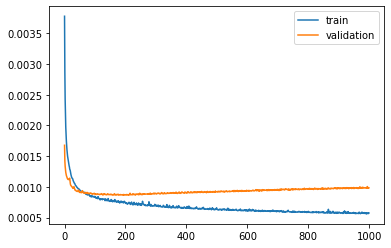

In [27]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

In [28]:
score = model.evaluate(x_test, y_test, verbose=1)

67/67 [==============================] - 4s 56ms/step - loss: 0.0015


In [29]:
#save model
model.save("Bilstm_TM_1.h5")
print("model saved")

model saved


In [30]:
# load model
model = load_model('Bilstm_TM_1.h5')
# summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 1000)              4120000   
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 529)               529529    
Total params: 4,649,529
Trainable params: 4,649,529
Non-trainable params: 0
_________________________________________________________________


In [31]:
y_pred=model.predict(x_test)
print("y_test_shape", y_test.shape)
print("", y_test)
print("")
print("y_pred_shape", y_pred.shape)
#print("y_pred", y_pred)
y_pred=pd.DataFrame(y_pred)
print(y_pred)

y_test_shape (2142, 529)
       0         1         2         3         4         5         6    \
0     0.0  0.000801  0.000080  0.007324  0.008302  0.000181  0.000000   
1     0.0  0.000507  0.000937  0.008774  0.022361  0.000137  0.000008   
2     0.0  0.000994  0.000280  0.007561  0.007226  0.000148  0.000000   
3     0.0  0.000499  0.000055  0.008047  0.012882  0.000157  0.000004   
4     0.0  0.000427  0.000012  0.010481  0.002219  0.000157  0.000000   
...   ...       ...       ...       ...       ...       ...       ...   
2137  0.0  0.026102  0.000000  0.043389  0.016551  0.000065  0.000405   
2138  0.0  0.012493  0.000000  0.107327  0.120661  0.000103  0.000009   
2139  0.0  0.004733  0.000000  0.121103  0.384409  0.000096  0.000005   
2140  0.0  0.006294  0.000000  0.090306  0.052256  0.000095  0.000002   
2141  0.0  0.013714  0.000000  0.029197  0.029333  0.000114  0.000003   

           7             8         9    ...  519       520       521  \
0     0.000031  1.470093e

In [32]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    print("actual", actual.shape)
    print("predictions", predictions.shape)
    mse = np.square(errors)
    mse['mean'] = mse.mean(axis=1)
    #print(mse)
    rmse = np.sqrt(mse)
    rmse['mean'] = rmse.mean(axis=1)
    #print(rmse)
    mae = np.abs(errors)
    mae['mean'] = mae.mean(axis=1)
    #mape['mean'] = mape.mean(axis=1)
    #print(mae)
    print(model_name + ":")
    print("Mean Square Error:", mse['mean'].mean(axis=0))
    print("Root Mean Square Error:", rmse['mean'].mean(axis=0))
    print("Mean Absolute Error:", mae['mean'].mean(axis=0))
    

print("y_test", y_test.shape)
print("y_train", y_pred.shape)
evaluate_prediction(y_pred, y_test, "Bilstm_TM_1")


y_test (2142, 529)
y_train (2142, 529)
actual (2142, 529)
predictions (2142, 529)
Bilstm_TM_1:
Mean Square Error: 0.001495595725161294
Root Mean Square Error: 0.014579350918614347
Mean Absolute Error: 0.014536570299859055
